In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9458254904403983616, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2247572722113964159
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12683370568587892836
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146783616
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13874584366258837258
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/traincopy.zip" -d "/content/drive/My Drive/Colab Notebooks/"

In [114]:
thresh = 0.9216

In [115]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [116]:
callbacks = myCallback()

In [117]:
train_path = '/content/drive/My Drive/Colab Notebooks/train copy/train'
test_path = '/content/drive/My Drive/Colab Notebooks/train copy/test'

In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(train_path,target_size=(150, 150),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=64)
test = test_datagen.flow_from_directory(test_path,target_size=(150, 150),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=64)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3,3),activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size = (3,3),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))




In [120]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 37, 37, 64)      

In [122]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=20, callbacks=[callbacks])

Epoch 1/20
351/351 [==============================] - 160s 457ms/step - loss: 0.7078 - accuracy: 0.5589 - val_loss: 0.6140 - val_accuracy: 0.6599
Epoch 2/20
351/351 [==============================] - 161s 459ms/step - loss: 0.6029 - accuracy: 0.6766 - val_loss: 0.5325 - val_accuracy: 0.7308
Epoch 3/20
351/351 [==============================] - 164s 467ms/step - loss: 0.5229 - accuracy: 0.7420 - val_loss: 0.4261 - val_accuracy: 0.8109
Epoch 4/20
351/351 [==============================] - 163s 463ms/step - loss: 0.4530 - accuracy: 0.7879 - val_loss: 0.4008 - val_accuracy: 0.8169
Epoch 5/20
351/351 [==============================] - 162s 462ms/step - loss: 0.3914 - accuracy: 0.8259 - val_loss: 0.3717 - val_accuracy: 0.8361
Epoch 6/20
351/351 [==============================] - 162s 462ms/step - loss: 0.3445 - accuracy: 0.8509 - val_loss: 0.2962 - val_accuracy: 0.8730
Epoch 7/20
351/351 [==============================] - 163s 465ms/step - loss: 0.3079 - accuracy: 0.8718 - val_loss: 0.2766 -

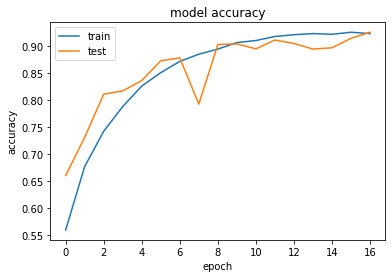

In [123]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()